In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load data
df = pd.read_csv('amzn_stock_data.csv')

In [3]:
# Preprocess data to set the 'Date' as index 
df['date'] = pd.to_datetime(df['date'])
df = df.drop_duplicates()
df.set_index('date', inplace=True)

In [4]:
# Display basic information
print(df.describe())
print(df.info())

             close         high          low         open        volume  \
count  6797.000000  6797.000000  6797.000000  6797.000000  6.797000e+03   
mean    554.564899   561.298101   547.571890   554.774287  1.000837e+07   
std     903.772564   914.446324   893.209394   904.532649  1.600114e+07   
min       5.970000     6.100000     5.510000     5.910000  4.060000e+04   
25%      47.990000    49.040000    46.500000    47.620000  3.431800e+06   
50%     128.600000   130.800000   126.330000   128.900000  5.400749e+06   
75%     524.000000   529.459900   517.200000   523.750000  8.494200e+06   
max    3731.410000  3773.078200  3696.792900  3744.000000  2.231334e+08   

          adjClose      adjHigh       adjLow      adjOpen     adjVolume  \
count  6797.000000  6797.000000  6797.000000  6797.000000  6.797000e+03   
mean     36.271630    36.709992    35.814053    36.279275  1.384484e+08   
std      52.388578    53.012669    51.756035    52.411073  1.372237e+08   
min       0.069792     0

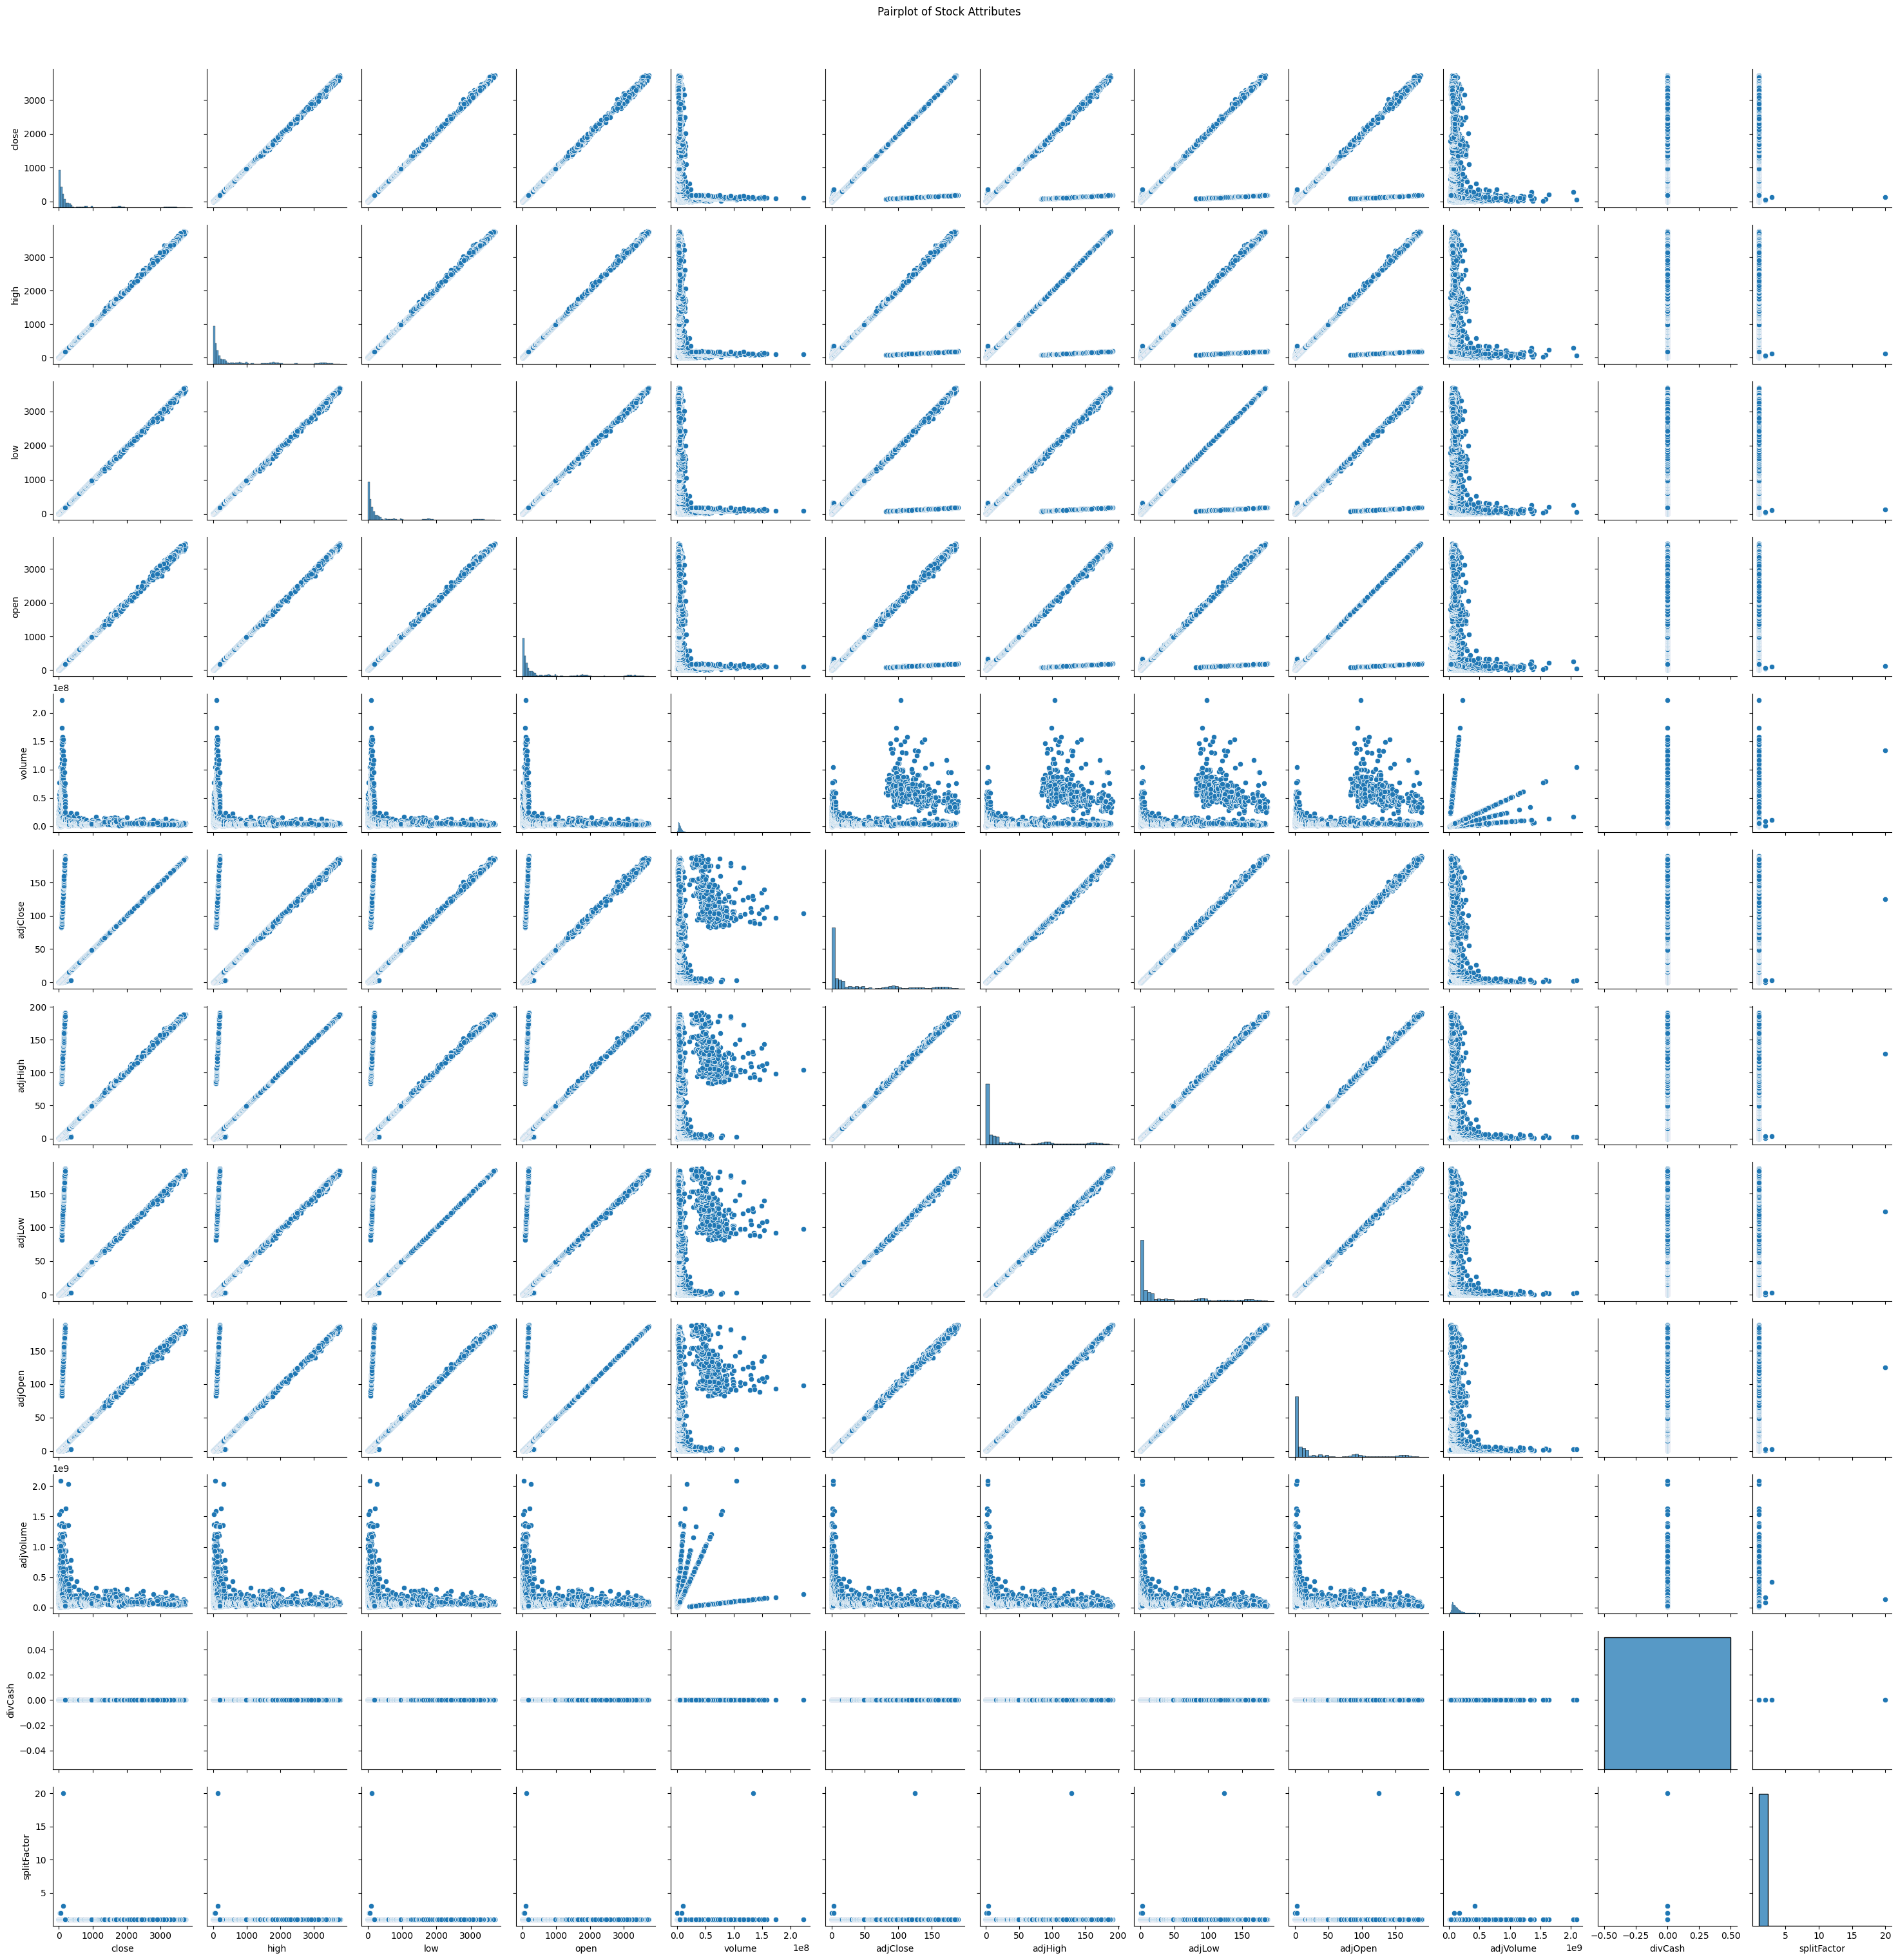

In [5]:
# Selecting the columns to visualize
columns_to_visualize = ['close', 'high', 'low', 'open', 'volume', 
                        'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 
                        'adjVolume', 'divCash', 'splitFactor']

# Create a pairplot
pairplot = sns.pairplot(df[columns_to_visualize])
plt.suptitle('Pairplot of Stock Attributes', y=1.02)

# Save the pairplot as an image
pairplot.savefig('pairplot.png')

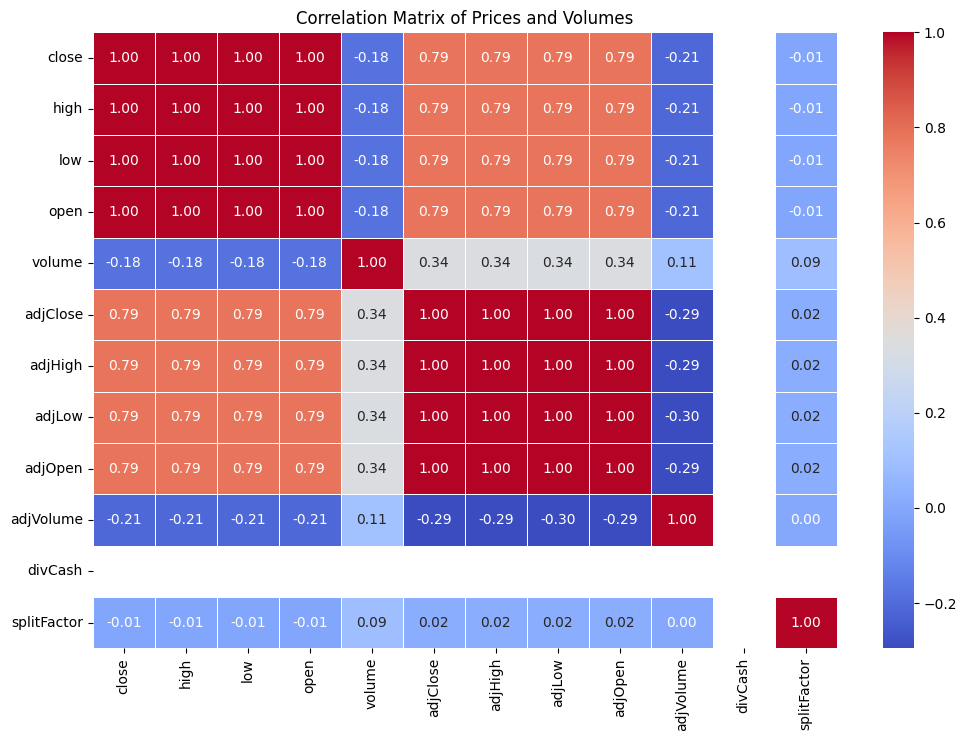

In [6]:
# Visualize correlation matrix
columns_to_check = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']
correlation_matrix = df[columns_to_check].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Prices and Volumes')
# Save the heatmap as an image
plt.savefig('correlation_matrix_heatmap.png')
plt.show()

In [7]:
# Dropping 'divCash' as the stock did not provided dividend
df = df.drop('divCash', axis=1)

In [8]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['close']])

In [9]:
# Create sequences
sequence_length = 60  # Use last 60 days to predict the next day
X, y = [], []
for i in range(sequence_length, len(df_scaled)):
    X.append(df_scaled[i-sequence_length:i, 0])
    y.append(df_scaled[i, 0])
X, y = np.array(X), np.array(y)

In [10]:
# Reshape X for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

In [11]:
# Build LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

C:\Users\nirma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 2.3921e-04 - val_loss: 0.0026
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.9452e-04 - val_loss: 0.0022
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 1.7712e-04 - val_loss: 0.0051
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 1.4448e-04 - val_loss: 0.0039
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 1.8045e-04 - val_loss: 0.0018
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 1.4075e-04 - val_loss: 0.0018
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 1.2508e-04 - val_loss: 0.0017
Epoch 9/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 1.1430e-04 - val_loss: 0.0025
Epoch 10/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 1.2068e-04 - val_loss: 0.0022
Epoch 11/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 1.2402e-04 - val_loss: 0.0015
E

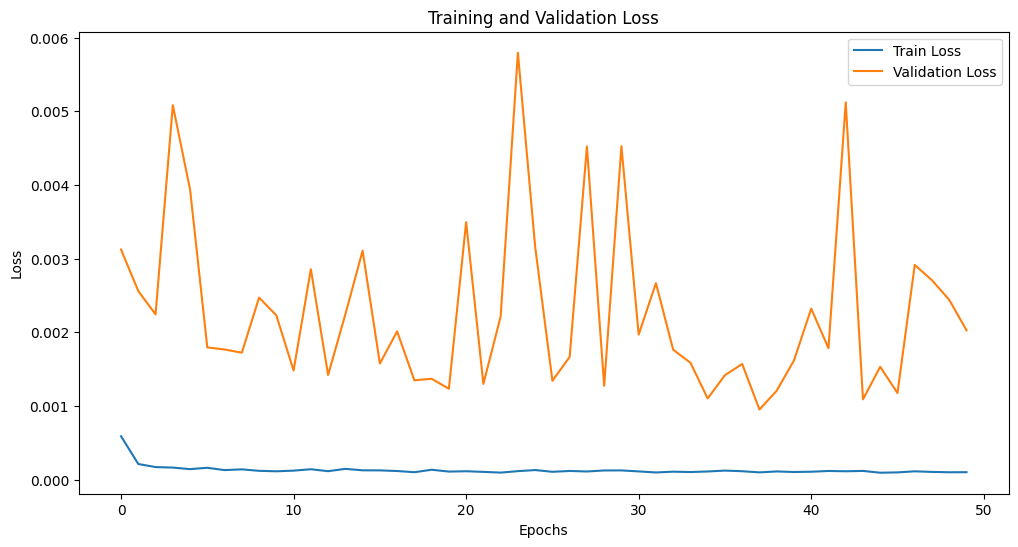

In [14]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Make predictions on the training data
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


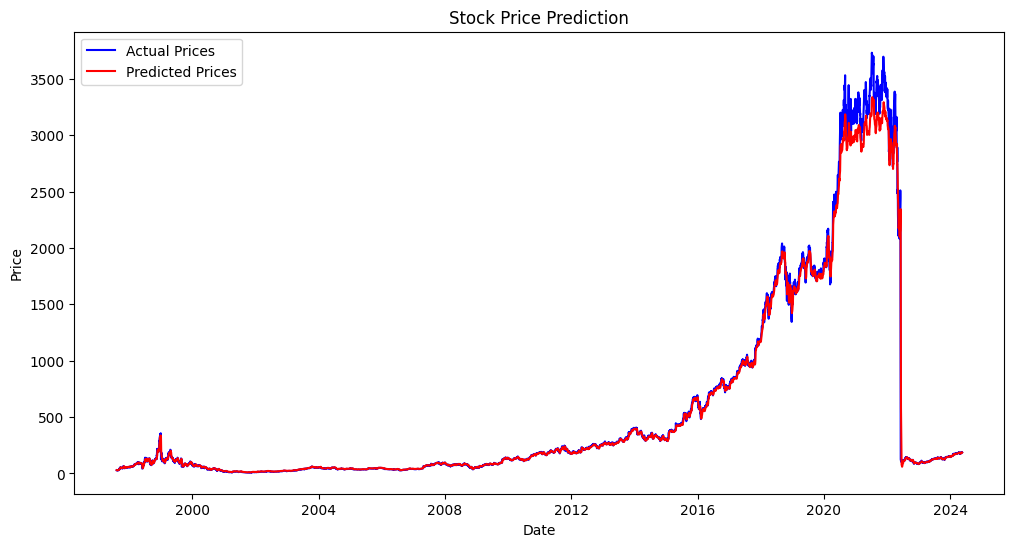

In [16]:
# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index[sequence_length:], df['close'][sequence_length:], color='blue', label='Actual Prices')
plt.plot(df.index[sequence_length:], predicted_prices, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Save the heatmap as an image
plt.savefig('Actual_Vs_Predicted.png')
plt.show()


In [17]:
# Calculate evaluation metrics
actual_prices_rescaled = scaler.inverse_transform(y.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(actual_prices_rescaled, predicted_prices))
mse = mean_squared_error(actual_prices_rescaled, predicted_prices)
mae = mean_absolute_error(actual_prices_rescaled, predicted_prices)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

RMSE: 77.01164093503505
MSE: 5930.792839506766
MAE: 25.41240594774869


In [18]:
# Save the model
model.save('lstm_model_amzn.h5')

In [19]:
# Load the model and predict future prices
model = load_model('lstm_model_amzn.h5')

In [20]:
# Prepare the input data for future prediction
latest_data = df['close'][-sequence_length:].values.reshape(-1, 1)
latest_data_scaled = scaler.transform(latest_data)

C:\Users\nirma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [21]:
# Predict the closing price for the next 10 days
future_predictions = []
num_future_days = 10

for _ in range(num_future_days):
    X_input = latest_data_scaled.reshape(1, sequence_length, 1)
    predicted_price_scaled = model.predict(X_input)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    future_predictions.append(predicted_price[0][0])
    
    # Update the latest data to include the predicted price
    latest_data_scaled = np.append(latest_data_scaled[1:], predicted_price_scaled)
    latest_data_scaled = latest_data_scaled.reshape(-1, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [22]:
# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_future_days, freq='B')

In [23]:
# Create DataFrame for future predictions
future_df = pd.DataFrame(data={'predicted_close': future_predictions}, index=future_dates)

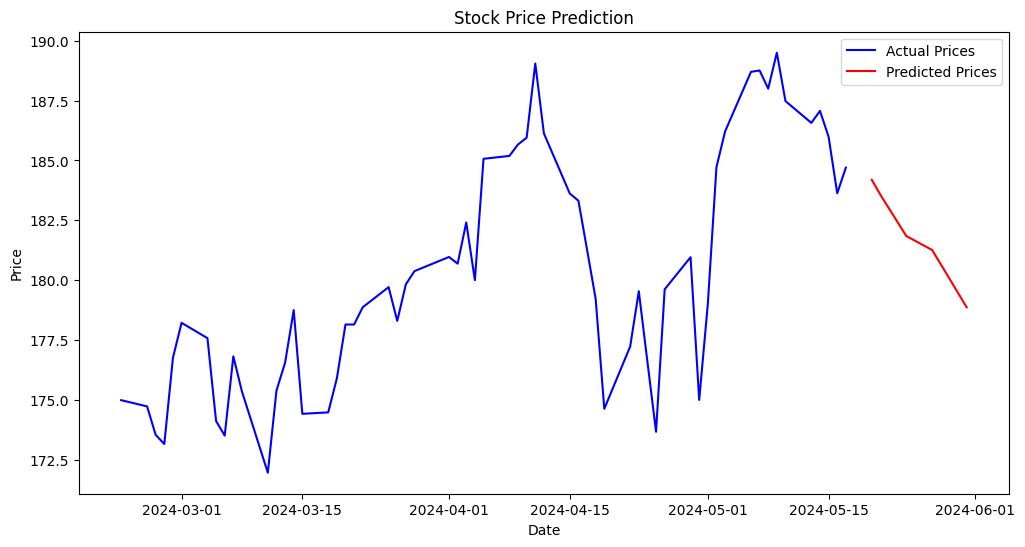

In [24]:
# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index[-sequence_length:], df['close'][-sequence_length:], color='blue', label='Actual Prices')
plt.plot(future_df.index, future_df['predicted_close'], color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [25]:
# Output the predicted prices
print(future_df)

                           predicted_close
2024-05-20 00:00:00+00:00       184.195297
2024-05-21 00:00:00+00:00       183.571533
2024-05-22 00:00:00+00:00       182.995453
2024-05-23 00:00:00+00:00       182.424789
2024-05-24 00:00:00+00:00       181.847366
2024-05-27 00:00:00+00:00       181.261459
2024-05-28 00:00:00+00:00       180.668594
2024-05-29 00:00:00+00:00       180.070938
2024-05-30 00:00:00+00:00       179.470673
2024-05-31 00:00:00+00:00       178.869507
